# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
import plotly.express as px
import xgboost as xgb
import warnings
from bs4 import BeautifulSoup
import lxml
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords # Import the stop word list
from nltk.metrics import edit_distance
from string import punctuation
from collections import Counter
from nltk.stem import WordNetLemmatizer
warnings.filterwarnings('ignore')
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from scipy.stats import chi2_contingency
import os
from os import path
from PIL import Image
from collections import Counter 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier

C:\Users\Shrishti\anaconda3\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shrishti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shrishti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shrishti\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Shrishti\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagge

# Importing the data

In [2]:
#data importing
data=pd.read_csv(r"D:\educational\sem2\RT\mbti_1.csv")
data.head(10)

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,NaN
5,INTJ,NaN
6,INFJ,NaN
7,INTJ,NaN
8,INFJ,NaN
9,INTP,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8692 entries, 0 to 8691
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8692 non-null   object
 1   posts   8607 non-null   object
dtypes: object(2)
memory usage: 135.9+ KB


In [4]:
data.posts[0]

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

#checking for null values and dropping them

In [5]:
data.isnull().sum().any()

True

In [6]:
data.isnull().sum()

type      0
posts    85
dtype: int64

In [7]:
#dropping null values
data.dropna(subset=['type','posts'], inplace=True)

In [8]:
data.describe(include='O')

,type,posts
count,8607,8607
unique,17,8590
top,INFP,'I suggest using Ti and Se more but it's unhea...
freq,1823,2


In [9]:
# Define a list of valid MBTI types
valid_types = ["INFP", "INFJ", "INTP", "INTJ", "ENTP", "ENFP", "ISTP", "ISFP",
               "ENTJ", "ISTJ", "ENFJ", "ISFJ", "ESTP", "ESFP", "ESFJ", "ESTJ"]

# Filter the DataFrame to only include rows with valid MBTI types
data = data[data["type"].isin(valid_types)]

In [10]:
print(data["type"].value_counts())

INFP    1823
INFJ    1462
INTP    1293
INTJ    1080
ENTP     678
ENFP     672
ISTP     334
ISFP     268
ENTJ     230
ISTJ     203
ENFJ     188
ISFJ     161
ESTP      88
ESFP      47
ESFJ      40
ESTJ      39
Name: type, dtype: int64


In [11]:
text = data[data.type == "INTP"]
text
names = data['type'].unique()
names

array(['INFJ', 'ENTP', 'INTP', 'INTJ', 'INFP', 'ENTJ', 'ENFP', 'ISFP',
       'ENFJ', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ'],
      dtype=object)

# EDA

In [12]:
type_count = data['type'].value_counts()
type_order = type_count.index.tolist() 

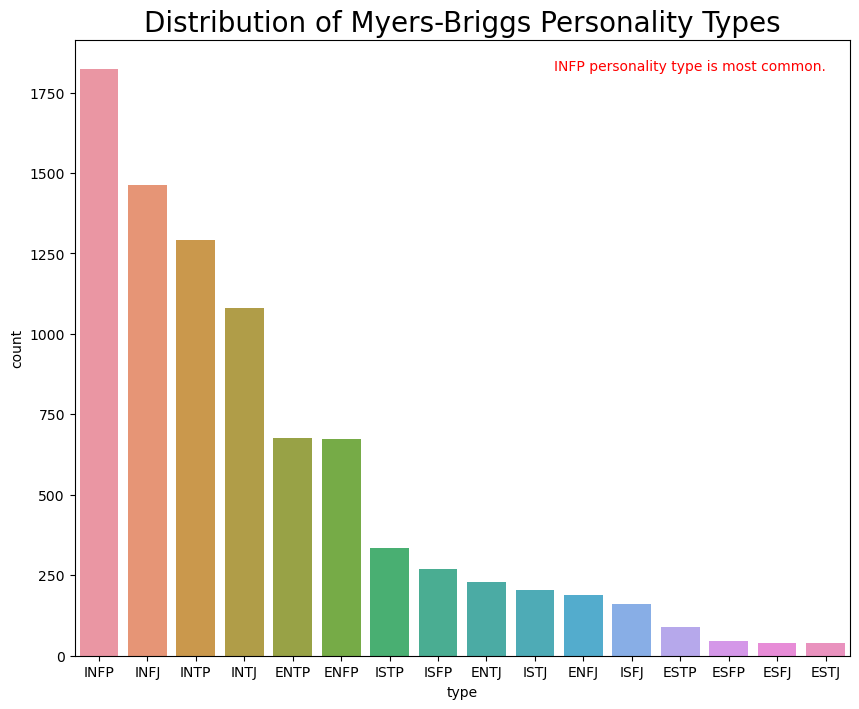

In [13]:
#bar chart for 16 MBTI Personality tyoes count
plt.figure(figsize=(10, 8))
sns.countplot(x='type', data=data,order=type_order)
plt.title('Distribution of Myers-Briggs Personality Types',fontsize=20)
plt.text(15, 1820, 'INFP personality type is most common.', fontsize=10, color='red',ha="right")
plt.show()

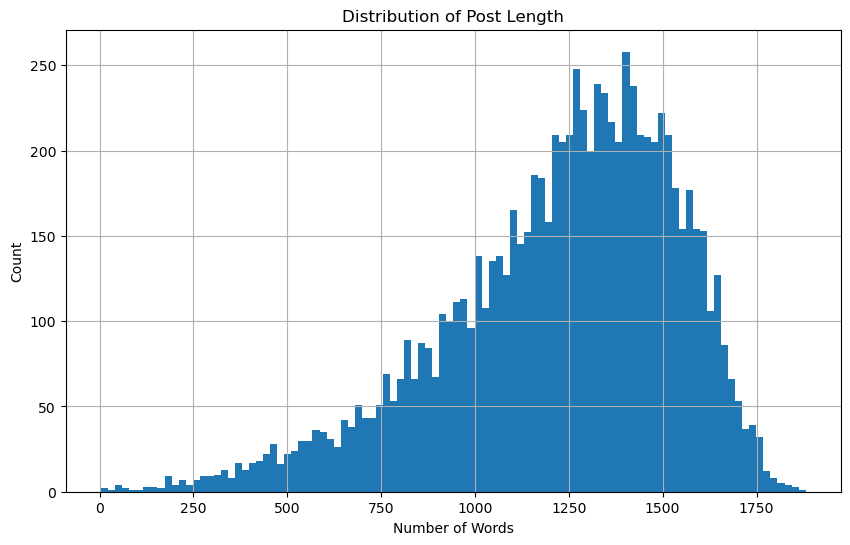

In [14]:
plt.figure(figsize=(10, 6))
data['posts'].str.split().apply(lambda x: len(x)).hist(bins=100)
plt.title('Distribution of Post Length')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.show() 

In [15]:
post_lengths = data['posts'].str.split().apply(lambda x: len(x))
data['post_length'] = post_lengths
grouped = data.groupby('type')
corrs = grouped['post_length'].agg(['mean', 'median', 'std'])
print(corrs)

             mean  median         std
type                                 
ENFJ  1288.085106  1349.5  310.299809
ENFP  1260.285714  1300.0  300.022858
ENTJ  1216.908696  1254.5  289.645312
ENTP  1205.185841  1241.5  281.187896
ESFJ  1281.150000  1318.5  352.571473
ESFP  1026.723404  1122.0  393.449168
ESTJ  1229.538462  1284.0  299.357456
ESTP  1164.295455  1219.5  324.881452
INFJ  1278.334473  1336.0  301.213818
INFP  1245.878771  1296.0  308.665649
INTJ  1194.482407  1248.0  319.064123
INTP  1197.187162  1246.0  305.630697
ISFJ  1237.968944  1315.0  361.637256
ISFP  1135.055970  1193.5  339.049797
ISTJ  1212.645320  1268.0  329.604687
ISTP  1166.149701  1220.0  322.441440


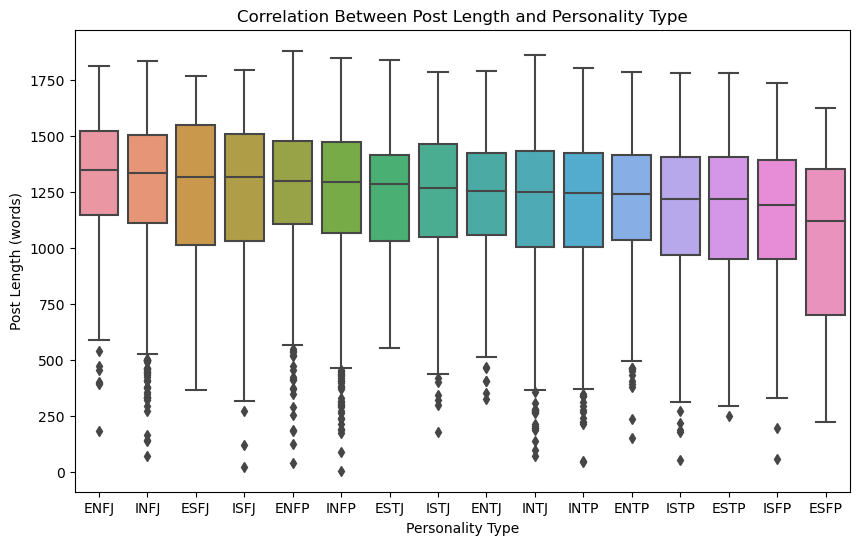

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='post_length', data=data, order=data.groupby('type')['post_length'].median().sort_values(ascending=False).index)
plt.title('Correlation Between Post Length and Personality Type')
plt.xlabel('Personality Type')
plt.ylabel('Post Length (words)')
plt.show()

Comment- we observe following points:

Most of the Personality types are normally distributed while few like ESTJ and ESFP are negatively skewed outliers in few personality types

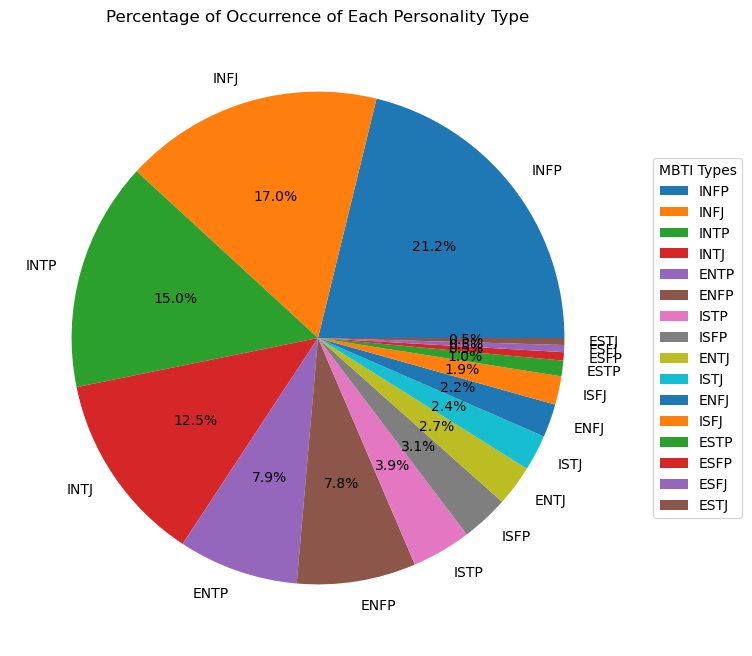

In [17]:
plt.figure(figsize=(8, 8))
plt.pie(type_count.values, labels=type_count.index, autopct='%1.1f%%')
plt.legend(title='MBTI Types', loc='center right', bbox_to_anchor=(1.2, 0.5))
plt.title('Percentage of Occurrence of Each Personality Type')
plt.show()

Comment- We observe that personality types are unbalanced in our data

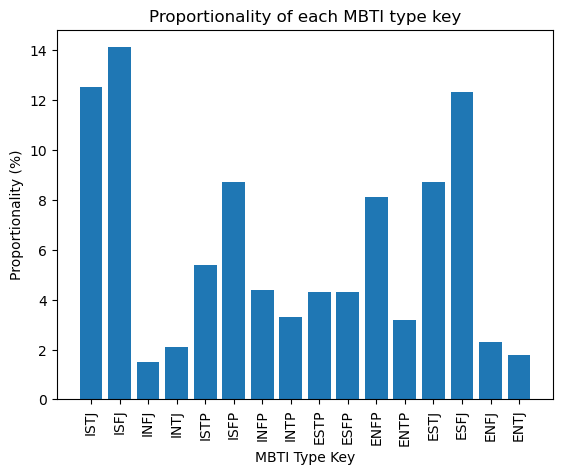

In [18]:
# Define the data
types = ['ISTJ', 'ISFJ', 'INFJ', 'INTJ', 'ISTP', 'ISFP', 'INFP', 'INTP', 'ESTP', 'ESFP', 'ENFP', 'ENTP', 'ESTJ', 'ESFJ', 'ENFJ', 'ENTJ']
proportions = [12.5, 14.1, 1.5, 2.1, 5.4, 8.7, 4.4, 3.3, 4.3, 4.3, 8.1, 3.2, 8.7, 12.3, 2.3, 1.8]

# Create a bar plot
plt.bar(types, proportions)

# Set the title and axis labels
plt.title('Proportionality of each MBTI type key')
plt.xlabel('MBTI Type Key')
plt.ylabel('Proportionality (%)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [19]:
 # Normalize the counts to get the proportion of each type in the population
type_props = type_count / type_count.sum()

# Create a table of frequencies and proportions
table = pd.DataFrame({'Frequency': type_count, 'Percentage': type_props.apply(lambda x: '{:.2f}%'.format(x*100))})

# Display the table
print(table)

      Frequency Percentage
INFP       1823     21.18%
INFJ       1462     16.99%
INTP       1293     15.02%
INTJ       1080     12.55%
ENTP        678      7.88%
ENFP        672      7.81%
ISTP        334      3.88%
ISFP        268      3.11%
ENTJ        230      2.67%
ISTJ        203      2.36%
ENFJ        188      2.18%
ISFJ        161      1.87%
ESTP         88      1.02%
ESFP         47      0.55%
ESFJ         40      0.46%
ESTJ         39      0.45%


In [20]:
# Count the number of occurrences of each type indicator
type_counts = data['type'].value_counts()
# Create a dictionary to store the distribution across type indicators
type_distribution = {'Introversion (I)': 0,
                     'Extroversion (E)': 0,
                     'Intuition (N)': 0,
                     'Sensing (S)': 0,
                     'Thinking (T)': 0,
                     'Feeling (F)': 0,
                     'Judging (J)': 0,
                     'Perceiving (P)': 0}

# Iterate over the type counts and update the type distribution dictionary
for i, count in type_counts.items():
    for j, letter in enumerate(i):
        if letter == 'I':
            type_distribution['Introversion (I)'] += count
        elif letter == 'E':
            type_distribution['Extroversion (E)'] += count
        elif letter == 'N':
            type_distribution['Intuition (N)'] += count
        elif letter == 'S':
            type_distribution['Sensing (S)'] += count
        elif letter == 'T':
            type_distribution['Thinking (T)'] += count
        elif letter == 'F':
            type_distribution['Feeling (F)'] += count
        elif letter == 'J':
            type_distribution['Judging (J)'] += count
        elif letter == 'P':
            type_distribution['Perceiving (P)'] += count

# Print the type distribution as a table
print('Type Indicator    Distribution')
for indicator, count in type_distribution.items():
    print(f'{indicator:<18}{count:>10}')

Type Indicator    Distribution
Introversion (I)        6624
Extroversion (E)        1982
Intuition (N)           7426
Sensing (S)             1180
Thinking (T)            3945
Feeling (F)             4661
Judging (J)             3403
Perceiving (P)          5203


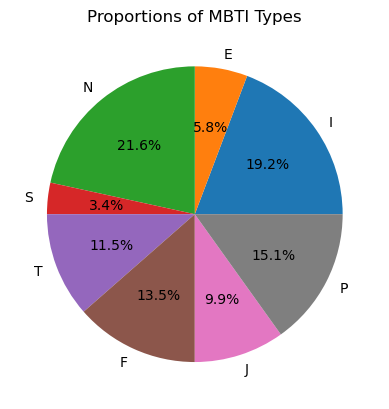

In [21]:
mbti_counts = data['type'].value_counts()

# Create a dictionary to hold the counts for each dimension
dimensions = {
    'I': 0,
    'E': 0,
    'N': 0,
    'S': 0,
    'T': 0,
    'F': 0,
    'J': 0,
    'P': 0
}

# Loop through each type and add the counts for each dimension
for mbti_type in mbti_counts.index:
    for dim in dimensions.keys():
        if mbti_type.count(dim) > 0:
            dimensions[dim] += mbti_counts[mbti_type]

# Calculate the total count
total_count = sum(dimensions.values())

# Calculate the proportion for each dimension
proportions = {}
for dim, count in dimensions.items():
    proportions[dim] = count / total_count

# Create a pie chart of the proportions
plt.pie(proportions.values(), labels=proportions.keys(), autopct='%1.1f%%')

# Set the title
plt.title('Proportions of MBTI Types')

# Show the plot
plt.show()

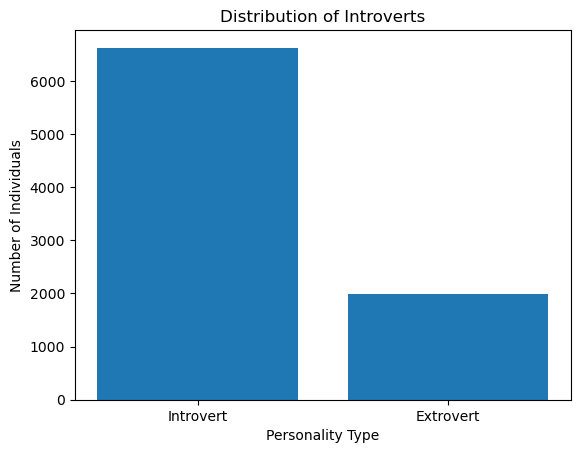

In [22]:
# Define the data
types = ['Introvert', 'Extrovert']
introvert_distribution = [6624, 1982]
extrovert_distribution = [7426, 1180]

# Create a bar plot for introvert distribution
plt.bar(types, introvert_distribution)
plt.title('Distribution of Introverts')
plt.xlabel('Personality Type')
plt.ylabel('Number of Individuals')
plt.show()

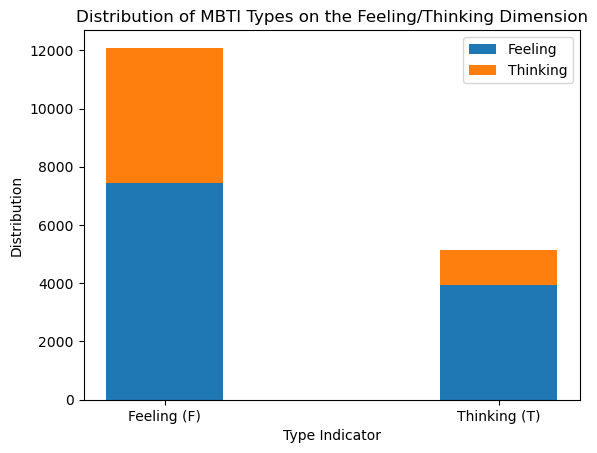

In [23]:
 # Define the data
categories = ['Feeling (F)', 'Thinking (T)']
feeling = [7426, 3945]
thinking = [4661, 1180]

# Set the width of the bars
bar_width = 0.35

# Create the bars
plt.bar(categories, feeling, width=bar_width, label='Feeling')
plt.bar(categories, thinking, width=bar_width, label='Thinking', bottom=feeling)

# Add labels and title
plt.xlabel('Type Indicator')
plt.ylabel('Distribution')
plt.title('Distribution of MBTI Types on the Feeling/Thinking Dimension')

# Add legend
plt.legend()

# Display the plot
plt.show()

In [24]:
# Just striping the string incase of any whitespace before or after the string
data["type"] = data["type"].str.strip()

# Seperate the label into four different parts
target_multi_label = data["type"].str.split("", expand=True)
target_multi_label = target_multi_label.iloc[:, 1:-1]
target_multi_label.columns = ["Personality-1", "Personality-2", "Personality-3", "Personality-4"]

data = pd.concat([data, target_multi_label], axis=1)

'''
personality_map = {
    "I": "Introvert",
    "E": "Extrovert",
    "N": "Intuitive",
    "S": "Sensitive",
    "F": "Emotional",
    "T": "Thinker",
    "J": "Judgemental",
    "P": "Perceiving"
}

for col in data.loc[:, "Personality-1":"Personality-4"].columns:
    data[col] = data[col].map(personality_map)
'''

data.head()

,type,posts,post_length,Personality-1,Personality-2,Personality-3,Personality-4
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,556,I,N,F,J
1,ENTP,'I'm finding the lack of me in these posts ver...,1170,E,N,T,P
2,INTP,'Good one _____ https://www.youtube.com/wat...,836,I,N,T,P
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",1064,I,N,T,J
15,INTP,"'Your comment screams INTJ, bro. Especially th...",1212,I,N,T,P


<Figure size 5000x2000 with 0 Axes>

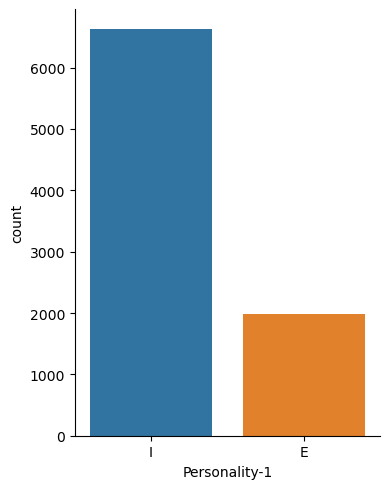

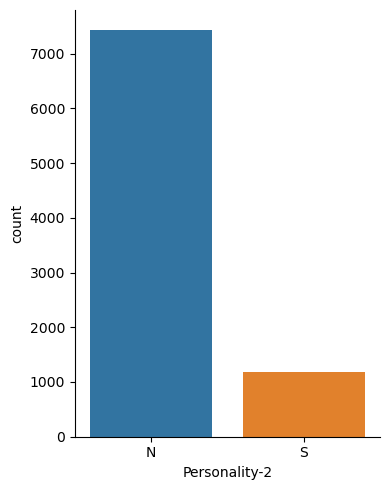

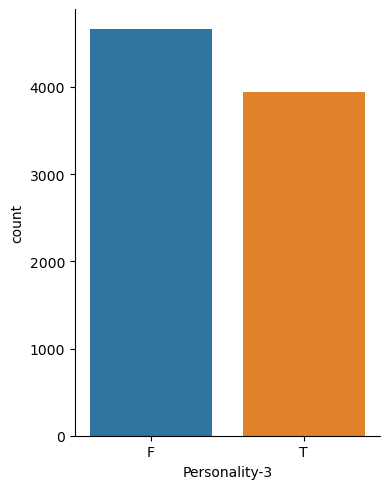

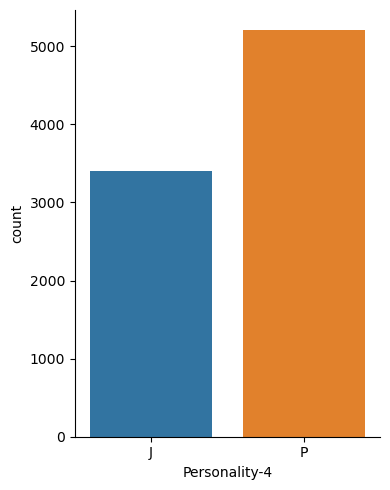

In [25]:
fig = plt.gcf()
fig.set_size_inches(50, 20)
sns.catplot(x="Personality-1", kind="count", data=data,height=5, aspect=4/5)
sns.catplot(x="Personality-2", kind="count", data=data,height=5, aspect=4/5)
sns.catplot(x="Personality-3", kind="count", data=data,height=5, aspect=4/5)
sns.catplot(x="Personality-4", kind="count", data=data,height=5, aspect=4/5)

# Preprocessing

In [26]:
#converting post column into lower case
data['posts'] = data['posts'].str.lower()
data.head()

,type,posts,post_length,Personality-1,Personality-2,Personality-3,Personality-4
0,INFJ,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,556,I,N,F,J
1,ENTP,'i'm finding the lack of me in these posts ver...,1170,E,N,T,P
2,INTP,'good one _____ https://www.youtube.com/wat...,836,I,N,T,P
3,INTJ,"'dear intp, i enjoyed our conversation the o...",1064,I,N,T,J
15,INTP,"'your comment screams intj, bro. especially th...",1212,I,N,T,P


In [27]:
import re
#removing urls for post column
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)


data['posts'] = data['posts'].apply(remove_urls)
data.head()

,type,posts,post_length,Personality-1,Personality-2,Personality-3,Personality-4
0,INFJ,' and intj moments sportscenter not top ten...,556,I,N,F,J
1,ENTP,'i'm finding the lack of me in these posts ver...,1170,E,N,T,P
2,INTP,"'good one _____ course, to which i say i k...",836,I,N,T,P
3,INTJ,"'dear intp, i enjoyed our conversation the o...",1064,I,N,T,J
15,INTP,"'your comment screams intj, bro. especially th...",1212,I,N,T,P


In [28]:
# Remove special characters and numbers from the "posts" column
def remove_special_chars(text):
    pattern = r'[^a-zA-z\s]'
    return re.sub(pattern, '', text)


data['posts'] = data['posts'].apply(remove_special_chars)
data.head(10)

,type,posts,post_length,Personality-1,Personality-2,Personality-3,Personality-4
0,INFJ,and intj moments sportscenter not top ten ...,556,I,N,F,J
1,ENTP,im finding the lack of me in these posts very ...,1170,E,N,T,P
2,INTP,good one _____ course to which i say i kno...,836,I,N,T,P
3,INTJ,dear intp i enjoyed our conversation the oth...,1064,I,N,T,J
15,INTP,your comment screams intj bro especially the u...,1212,I,N,T,P
16,INFJ,some of these both excite and calm me butts ...,1376,I,N,F,J
17,INFP,i think we do agree i personally dont consider...,1637,I,N,F,P
18,INFJ,i fully believe in the power of being a protec...,1530,I,N,F,J
19,INFP,thats normal it happens also to me if i am in ...,1139,I,N,F,P
20,INTP,steve jobs was recognized for his striving for...,1085,I,N,T,P


In [29]:
# Remove extra spaces from the "posts" column
def remove_extra_spaces(text):
    pattern = r'\s+'
    return re.sub(pattern, ' ', text)


data['posts'] = data['posts'].apply(remove_extra_spaces)
data.head(10)

,type,posts,post_length,Personality-1,Personality-2,Personality-3,Personality-4
0,INFJ,and intj moments sportscenter not top ten pla...,556,I,N,F,J
1,ENTP,im finding the lack of me in these posts very ...,1170,E,N,T,P
2,INTP,good one _____ course to which i say i know th...,836,I,N,T,P
3,INTJ,dear intp i enjoyed our conversation the other...,1064,I,N,T,J
15,INTP,your comment screams intj bro especially the u...,1212,I,N,T,P
16,INFJ,some of these both excite and calm me butts bo...,1376,I,N,F,J
17,INFP,i think we do agree i personally dont consider...,1637,I,N,F,P
18,INFJ,i fully believe in the power of being a protec...,1530,I,N,F,J
19,INFP,thats normal it happens also to me if i am in ...,1139,I,N,F,P
20,INTP,steve jobs was recognized for his striving for...,1085,I,N,T,P


In [30]:
#Removing more extra characters 
data['posts'] = data['posts'].str.replace(r'_{1,}', '', regex=True)
data.head(10)

,type,posts,post_length,Personality-1,Personality-2,Personality-3,Personality-4
0,INFJ,and intj moments sportscenter not top ten pla...,556,I,N,F,J
1,ENTP,im finding the lack of me in these posts very ...,1170,E,N,T,P
2,INTP,good one course to which i say i know thats m...,836,I,N,T,P
3,INTJ,dear intp i enjoyed our conversation the other...,1064,I,N,T,J
15,INTP,your comment screams intj bro especially the u...,1212,I,N,T,P
16,INFJ,some of these both excite and calm me butts bo...,1376,I,N,F,J
17,INFP,i think we do agree i personally dont consider...,1637,I,N,F,P
18,INFJ,i fully believe in the power of being a protec...,1530,I,N,F,J
19,INFP,thats normal it happens also to me if i am in ...,1139,I,N,F,P
20,INTP,steve jobs was recognized for his striving for...,1085,I,N,T,P


In [31]:

# Define the stop words to remove
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Define a function to remove stop words from text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Remove stop words from the "posts" column
data['posts'] = data['posts'].apply(remove_stopwords)

data.head()
data.tail()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shrishti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,type,posts,post_length,Personality-1,Personality-2,Personality-3,Personality-4
8657,INTP,great thread find interesting different two ty...,1224,I,N,T,P
8658,INFP,sam cooke change gonna comei cant stand mainst...,1357,I,N,F,P
8659,INFJ,working every day gotta keep reminding proper ...,1301,I,N,F,J
8690,INFP,conflicted right comes wanting children honest...,1705,I,N,F,P
8691,INFP,long since personalitycafe although doesnt see...,1361,I,N,F,P


In [32]:
# Define a function to remove MBTI personality names from text
def remove_mbti(text):
    return re.sub(mbti_pattern, '', text)

mbti_pattern = r'\b(?:istj|isfj|infj|intj|istp|isfp|infp|intp|estp|esfp|enfp|entp|estj|esfj|enfj|entj)\b'
# Remove MBTI personality names from the "posts" column
data['posts'] = data['posts'].apply(remove_mbti)
data.head()

,type,posts,post_length,Personality-1,Personality-2,Personality-3,Personality-4
0,INFJ,moments sportscenter top ten plays prankswhat...,556,I,N,F,J
1,ENTP,im finding lack posts alarmingsex boring posit...,1170,E,N,T,P
2,INTP,good one course say know thats blessing cursed...,836,I,N,T,P
3,INTJ,dear enjoyed conversation day esoteric gabbin...,1064,I,N,T,J
15,INTP,comment screams bro especially useless partth...,1212,I,N,T,P


# Lemmatization

In [33]:
# Convert the "posts" column to a string data type
data['posts'] = data['posts'].astype(str)
# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize a sentence
def lemmatize_sentence(sentence):
    # Tokenize the sentence into words
    words = nltk.word_tokenize(sentence)
    # Get the part of speech for each word
    pos_tags = nltk.pos_tag(words)
    # Map part of speech tags to WordNet tags
    wordnet_tags = {
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'R': wordnet.ADV,
        'J': wordnet.ADJ
    }
    # Lemmatize each word using the appropriate WordNet tag
    lem_words = []
    for word, pos in pos_tags:
        if pos[0] in wordnet_tags:
            tag = wordnet_tags[pos[0]]
            lem_word = lemmatizer.lemmatize(word, tag)
        else:
            lem_word = lemmatizer.lemmatize(word)
        lem_words.append(lem_word)
    # Join the lemmatized words back into a sentence
    lem_sentence = ' '.join(lem_words)
    return lem_sentence

In [34]:
# Lemmatize the "posts" column
data['posts_lemmatized'] = data['posts'].apply(lemmatize_sentence)

In [35]:
print(data['posts_lemmatized'].head())

0     moment sportscenter top ten play prankswhat li...
1     im find lack post alarmingsex boring position ...
2     good one course say know thats bless cursedoes...
3     dear enjoyed conversation day esoteric gabbing...
15    comment scream bro especially useless partthan...
Name: posts_lemmatized, dtype: object


# WordCloud

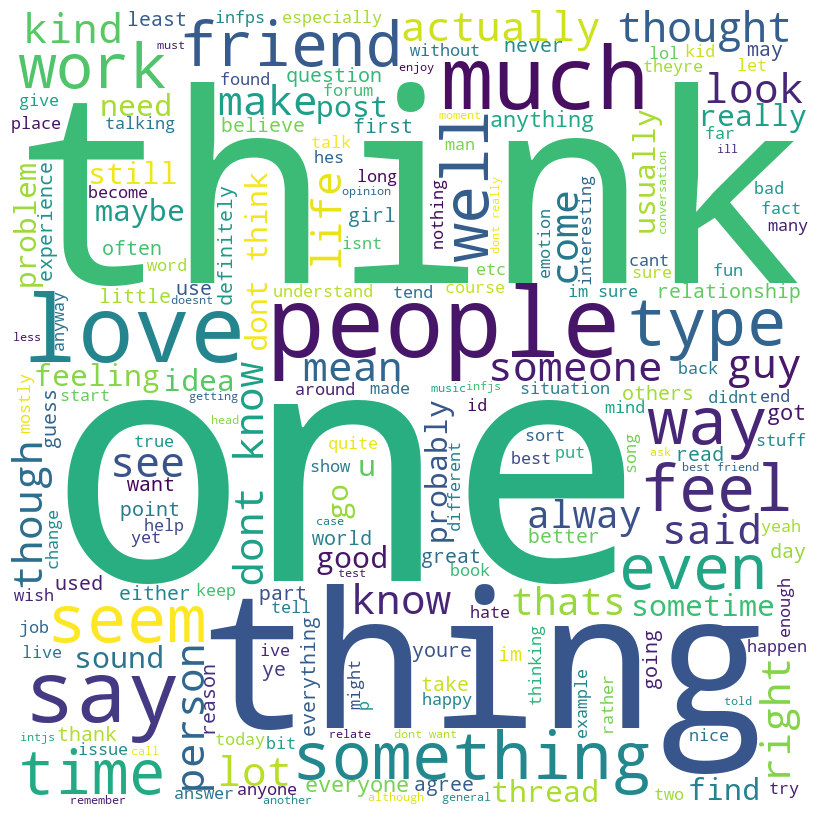

In [36]:
# Join all posts into a single string
text = ' '.join(data['posts'])

# Create the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

# Plot the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)

plt.show()

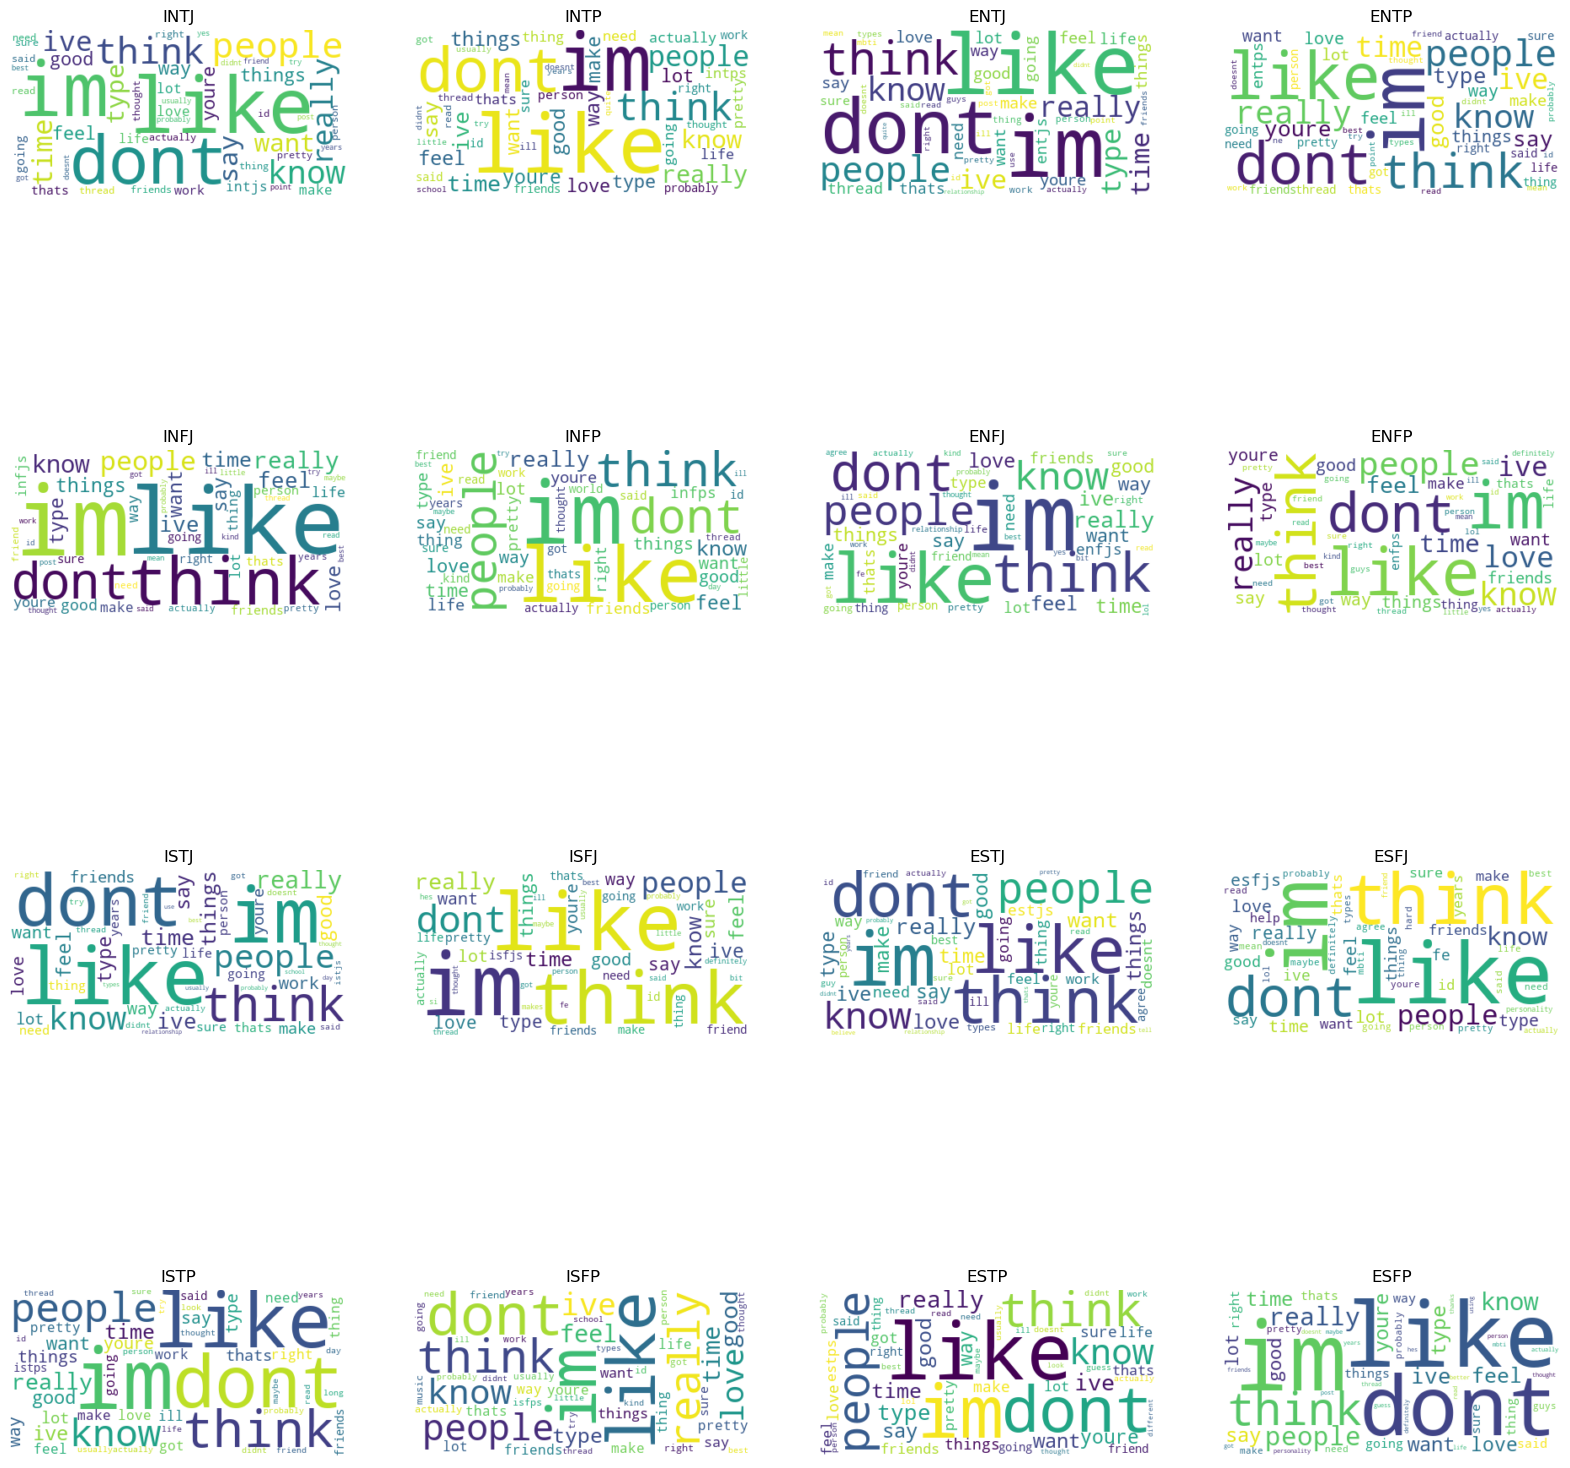

In [37]:
 # define the personality types
types = ['INTJ', 'INTP', 'ENTJ', 'ENTP', 'INFJ', 'INFP', 'ENFJ', 'ENFP', 'ISTJ', 'ISFJ', 'ESTJ', 'ESFJ', 'ISTP', 'ISFP', 'ESTP', 'ESFP']

# create a figure and a grid of plots
fig, axs = plt.subplots(4, 4, figsize=(20, 20))

# loop through each personality type and plot the graphs in the corresponding subplot
for i, p_type in enumerate(types):
    # create a subset of the data for the personality type
    subset = data[data['type'] == p_type]
    
    # create a TF-IDF vectorizer object
    vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    
    # fit the vectorizer on the posts for the personality type
    X = vectorizer.fit_transform(subset['posts'])
    
    # get the feature names and their corresponding TF-IDF values
    feature_names = vectorizer.get_feature_names()
    tfidf = pd.DataFrame(X.toarray(), columns=feature_names)
    
    # calculate the mean TF-IDF value for each feature
    means = tfidf.mean(axis=0).sort_values(ascending=False)[:10]
    
    # plot the mean TF-IDF values for the top 10 features in the corresponding subplot
    ax = axs[i//4, i%4]
    ax.bar(means.index, means.values)
    ax.set_title(p_type)
    ax.set_xlabel('Word')
    ax.set_ylabel('Mean TF-IDF Value')
    ax.tick_params(axis='x', labelrotation=45)
    
    # create a word cloud of the top 50 features in the corresponding subplot
    wc = WordCloud(background_color='white', max_words=50)
    wc.generate_from_frequencies(tfidf.sum(axis=0))
    ax.imshow(wc, interpolation='bilinear')
    ax.axis('off')

# adjust the spacing between the plots and show the figure
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

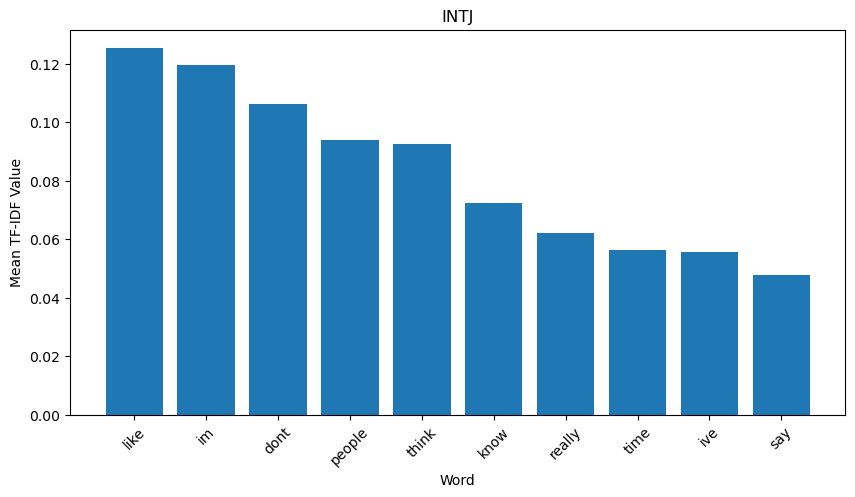

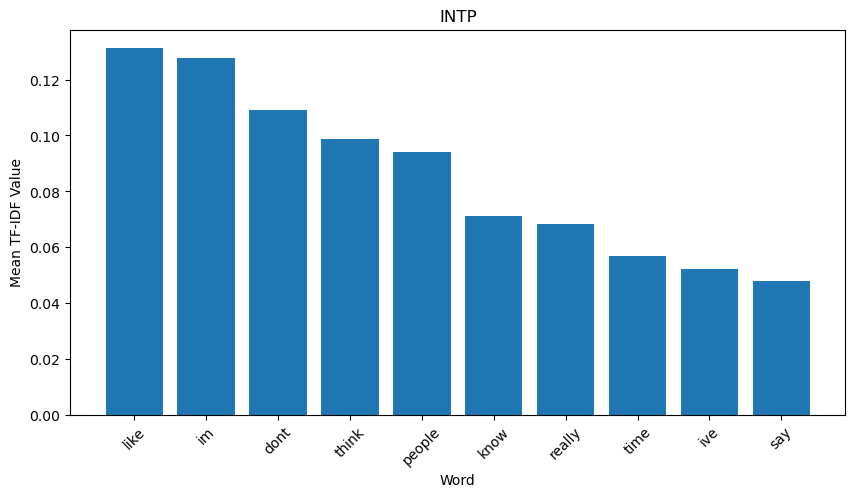

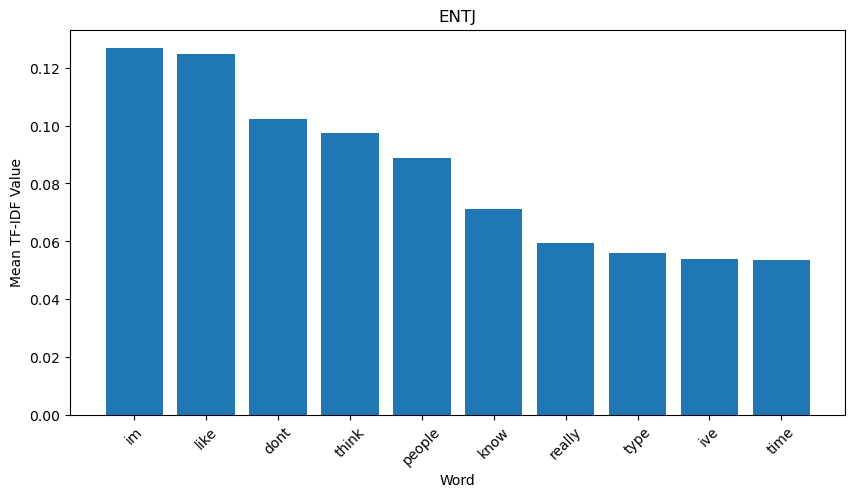

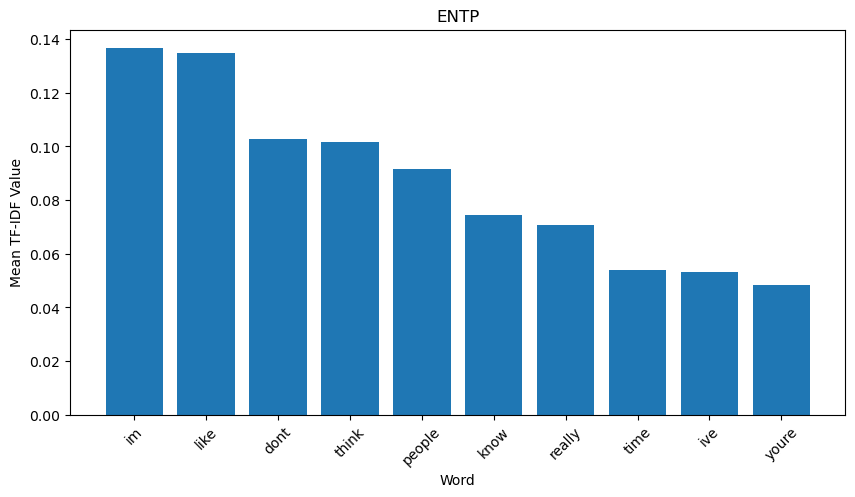

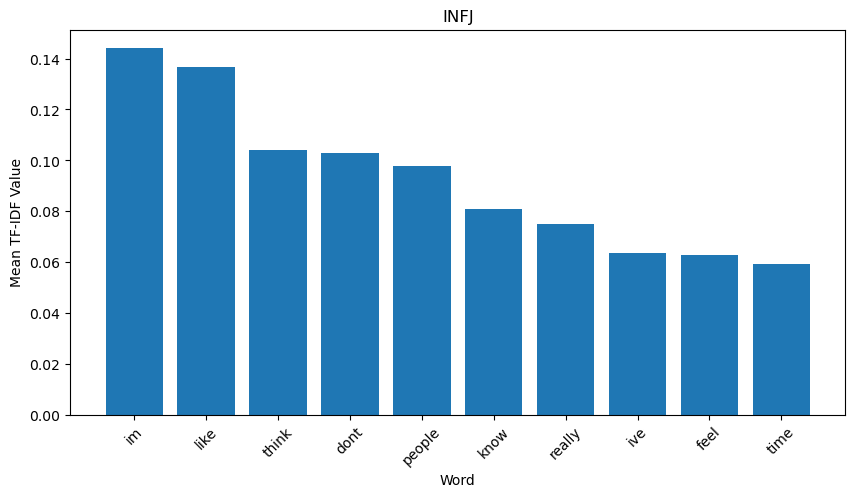

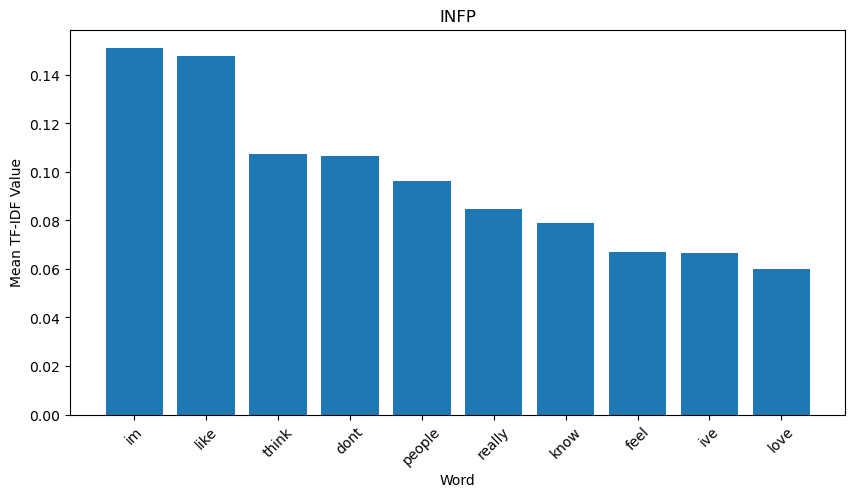

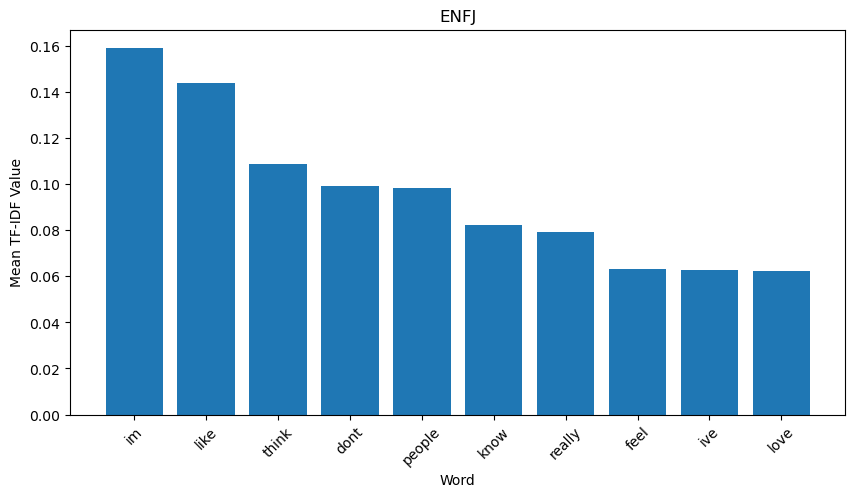

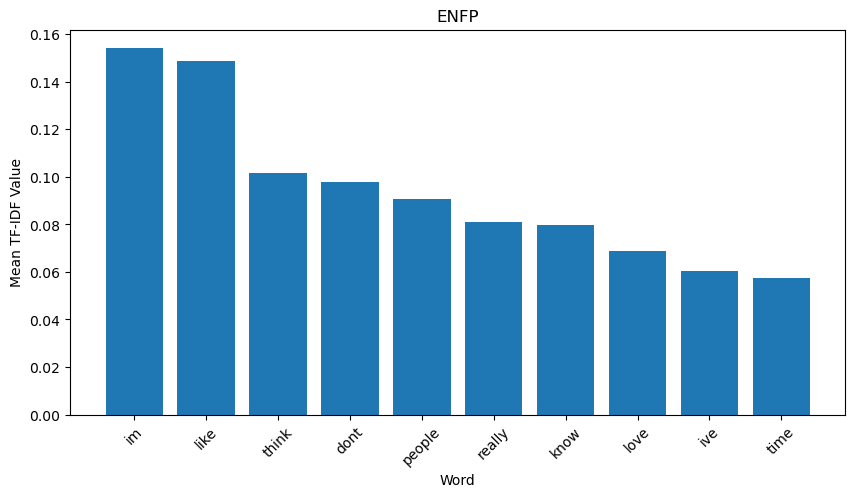

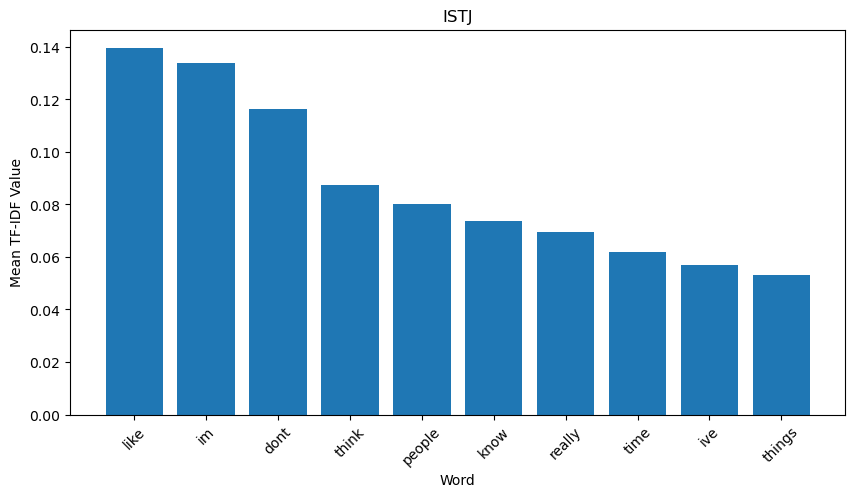

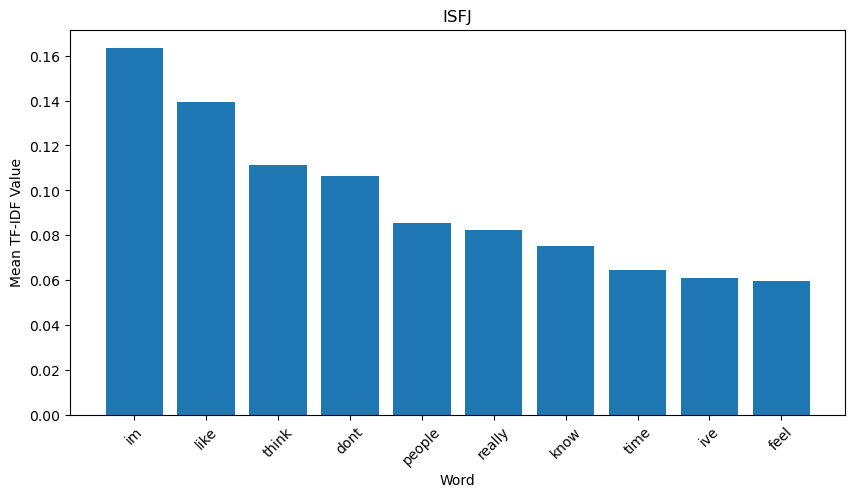

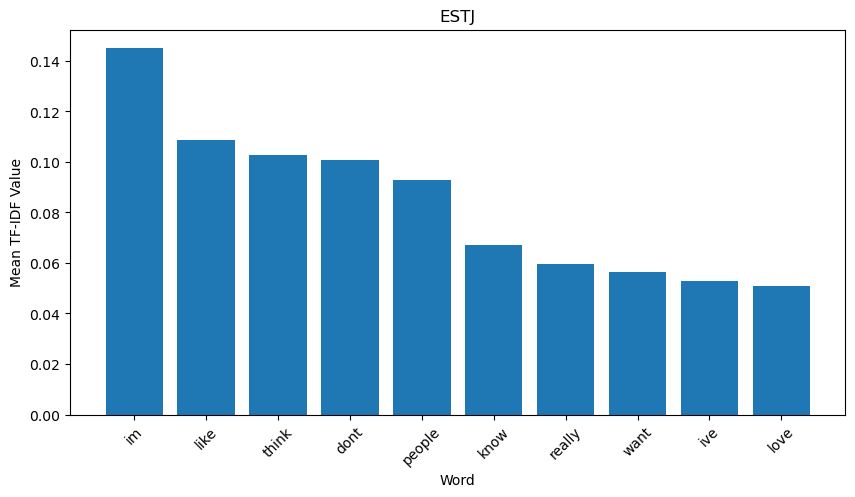

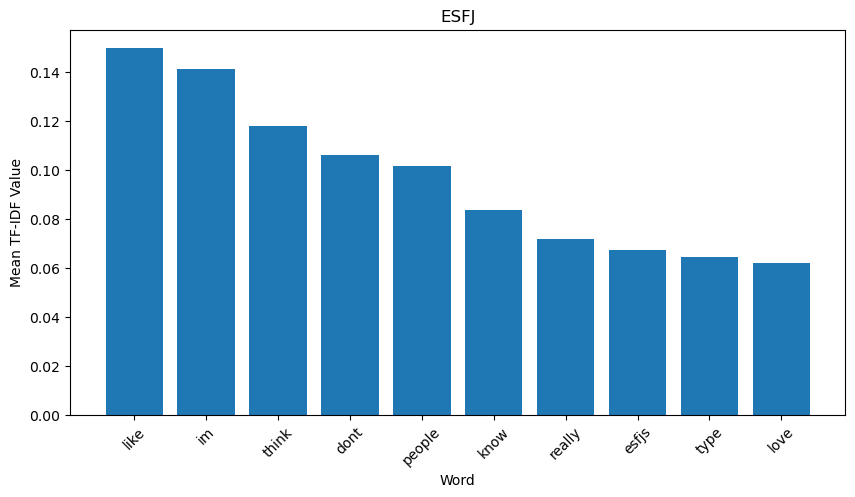

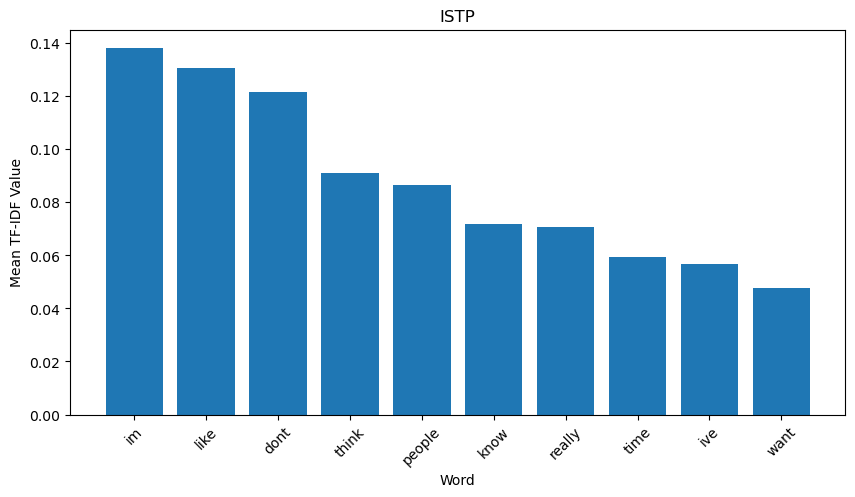

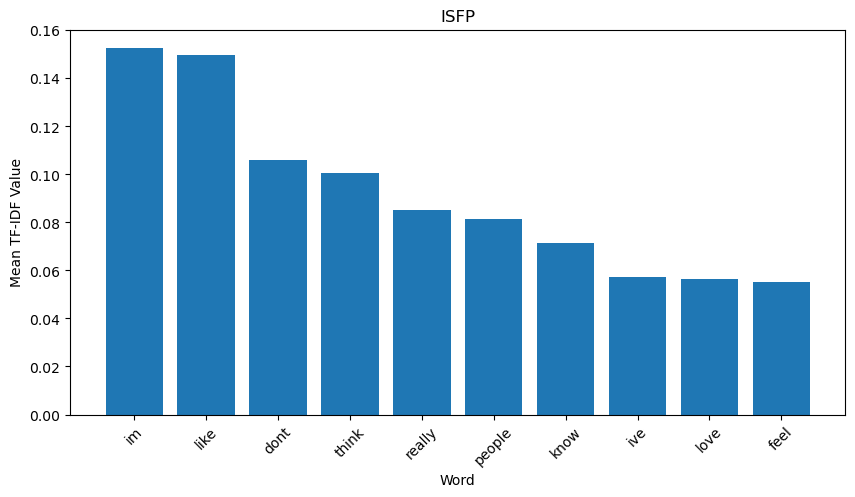

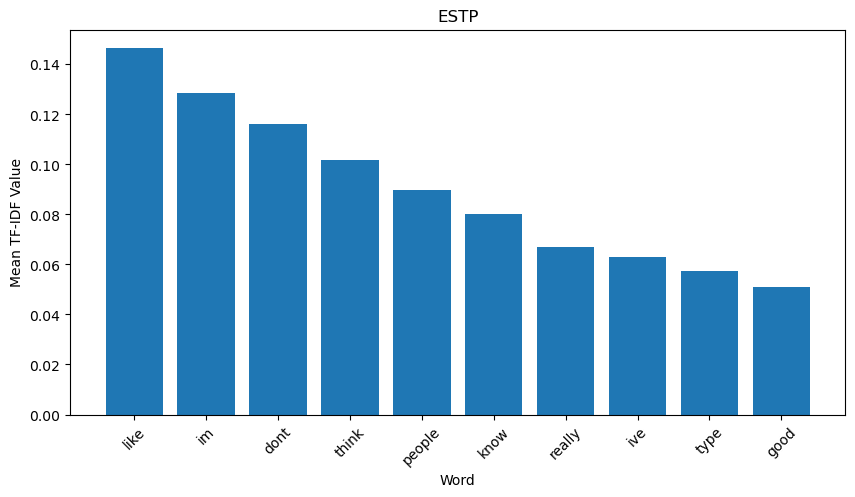

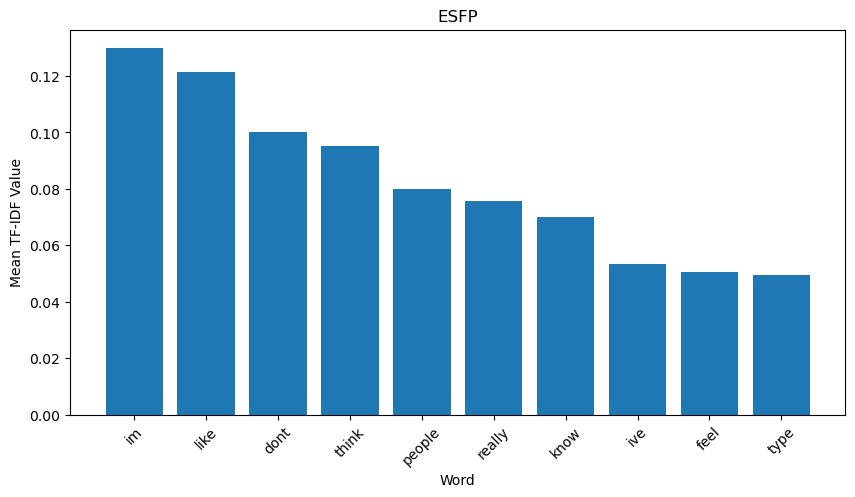

In [38]:
# define the personality types
types = ['INTJ', 'INTP', 'ENTJ', 'ENTP', 'INFJ', 'INFP', 'ENFJ', 'ENFP', 'ISTJ', 'ISFJ', 'ESTJ', 'ESFJ', 'ISTP', 'ISFP', 'ESTP', 'ESFP']

# loop through each personality type
for p_type in types:
    # create a subset of the data for the personality type
    subset = data[data['type'] == p_type]
    
    # create a TF-IDF vectorizer object
    vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    
    # fit the vectorizer on the posts for the personality type
    X = vectorizer.fit_transform(subset['posts'])
    
    # get the feature names and their corresponding TF-IDF values
    feature_names = vectorizer.get_feature_names()
    tfidf = pd.DataFrame(X.toarray(), columns=feature_names)
    
    # calculate the mean TF-IDF value for each feature
    means = tfidf.mean(axis=0).sort_values(ascending=False)[:10]
    
    # plot the mean TF-IDF values for the top 10 features
    plt.figure(figsize=(10, 5))
    plt.bar(means.index, means.values)
    plt.title(p_type)
    plt.xlabel('Word')
    plt.ylabel('Mean TF-IDF Value')
    plt.xticks(rotation=45)
    plt.show()

In [39]:
byType = data.groupby("type")
byType.describe()

post_length                                                            \
           count         mean         std    min      25%     50%      75%   
type                                                                         
ENFJ       188.0  1288.085106  310.299809  180.0  1145.75  1349.5  1522.00   
ENFP       672.0  1260.285714  300.022858   38.0  1105.75  1300.0  1475.50   
ENTJ       230.0  1216.908696  289.645312  325.0  1057.25  1254.5  1422.75   
ENTP       678.0  1205.185841  281.187896  152.0  1034.25  1241.5  1413.00   
ESFJ        40.0  1281.150000  352.571473  365.0  1011.00  1318.5  1547.75   
ESFP        47.0  1026.723404  393.449168  223.0   702.00  1122.0  1353.50   
ESTJ        39.0  1229.538462  299.357456  553.0  1028.50  1284.0  1415.00   
ESTP        88.0  1164.295455  324.881452  249.0   950.75  1219.5  1407.25   
INFJ      1462.0  1278.334473  301.213818   72.0  1110.25  1336.0  1503.00   
INFP      1823.0  1245.878771  308.665649    4.0  1068.00  1296.0  1472.00   
INTJ      1080.0  1194.482407  319.064123   69.0  1004.75  1248.0  1434.25   
INTP      1293.0  1197.187162  305.630697   42.0  1003.00  1246.0  1426.00   
ISFJ       161.0  1237.968944  361.637256   21.0  1031.00  1315.0  1509.00   
ISFP       268.0  1135.055970  339.049797   58.0   950.25  1193.5  1394.25   
ISTJ       203.0  1212.645320  329.604687  178.0  1049.50  1268.0  1465.50   
ISTP       334.0  1166.149701  322.441440   51.0   967.00  1220.0  1407.75   

              
         max  
type          
ENFJ  1813.0  
ENFP  1881.0  
ENTJ  1790.0  
ENTP  1785.0  
ESFJ  1766.0  
ESFP  1627.0  
ESTJ  1840.0  
ESTP  1782.0  
INFJ  1833.0  
INFP  1849.0  
INTJ  1861.0  
INTP  1804.0  
ISFJ  1795.0  
ISFP  1737.0  
ISTJ  1785.0  
ISTP  1781.0

#plt.rcParams.update({'figure.max_open_warning': 0})
i=0    
while i < len(names):
    for name in names:
        nameReturn = "".join(post for post in data[data["type"]== name].posts)
        nameReturn = nameReturn.lower()
        split = nameReturn.split() 
        filtered_words = [word for word in split if word not in stopwords]
        counter = Counter(filtered_words)
        most_occur = counter.most_common(10) 
        plt.figure()
        df = pd.DataFrame(most_occur, columns = ['Word', 'Count'])
        df.plot.bar(x='Word',y='Count', title=name, figsize=(13,8))
        i+=1

# splitting the data

In [114]:
# Preprocess data
X = data['posts'].values
y = data['type'].values
le = LabelEncoder()
y = le.fit_transform(y)

# Tokenize and vectorize text data
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KeyboardInterrupt: 

In [113]:
# Apply SMOTE to oversample minority classes
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Convert data to DMatrix format
dtrain = xgb.DMatrix(X_train_resampled, label=y_train_resampled)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters
params = {
    'max_depth': 5,
    'eta': 0.1,
    'objective': 'multi:softmax',
    'num_class': len(np.unique(y)),
    'lambda': 1, # L2 regularization parameter
    'alpha': 0.5 # L1 regularization parameter
}

# Train model
model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions on testing data
y_pred = model.predict(dtest)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy*100))

Accuracy: 52.79%


In [ ]:

# Define XGBoost classifier and train on training set
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)

# Make predictions on validation set
y_pred = clf.predict(X_val)

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Print confusion matrix and accuracy score
print("Confusion matrix:\n", cm)
accuracy = np.sum(np.diag(cm)) / np.sum(cm)
print("Accuracy score: {:.2f}%".format(accuracy*100))

# Compute misclassifications and their corresponding true and predicted labels
misclassifications = np.where(y_val != y_pred)[0]
true_labels = y_val[misclassifications]
predicted_labels = y_pred[misclassifications]

# Print examples of misclassifications and their true/predicted labels
print("\nExamples of misclassifications:")
for i in range(min(5, len(misclassifications))):
    print("True label: {}, Predicted label: {}".format(le.inverse_transform([true_labels[i]])[0], le.inverse_transform([predicted_labels[i]])[0]))
    print("Text: ", vectorizer.inverse_transform(X_val[misclassifications[i]])[0])
    print()

In [40]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Preprocess data
X = data['posts'].values
y = data['type'].values
le = LabelEncoder()
y = le.fit_transform(y)

# Tokenize and vectorize text data
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(X)
# Define XGBoost classifier
clf = xgb.XGBClassifier()

# Define hyperparameters to search over
param_grid = {
    'max_depth': [3, 5, 7],
    'eta': [0.1, 0.3, 0.5],
    'lambda': [0, 1, 5],
    'alpha': [0, 0.5, 1],
    'num_boost_round': [50, 100, 200]
}

# Define cross-validation strategy
cv = 3

# Perform grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

# Print best parameters and accuracy score
print("Best parameters: ", grid_search.best_params_)
print("Best accuracy score: {:.2f}%".format(grid_search.best_score_*100))

In [70]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42, stratify=data.type)

In [ ]:
X=train_data.drop('type',axis=1)
y=train_data['type']
# Instantiate the RandomOverSampler algorithm
ros = RandomOverSampler()

# Apply RandomOverSampler to the data
X_resampled, y_resampled = ros.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

#Split data into features and target
X = data.drop('type', axis=1)
y = data['type']

#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


smote = SMOTE(random_state=42)

try:
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
except ValueError as e:
    print(e)
    print("Skipping resampling step as there are no minority class samples in the training data")
    X_train_resampled, y_train_resampled = X_train, y_train
    
df_resampled = pd.concat([X_train_resampled, y_train_resampled], axis=1)

#Oversample minority classes
oversampler = RandomOverSampler(random_state=42)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)
#Undersample majority classes
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

#Create a new DataFrame with the resampled data
df_resampled = pd.concat([X_train_resampled, y_train_resampled], axis=1)

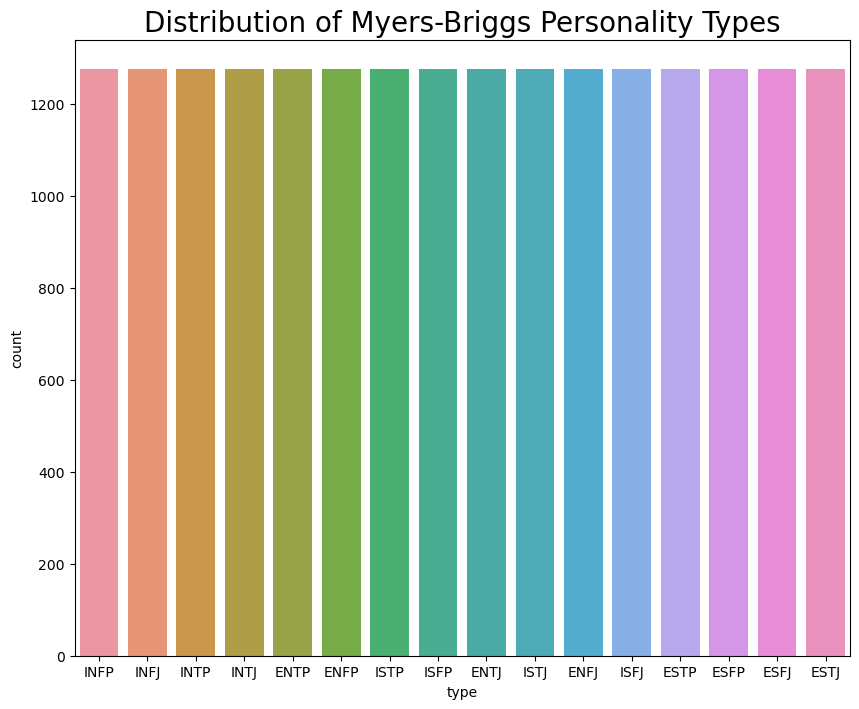

In [71]:
type_count = data['type'].value_counts()
type_order = type_count.index.tolist() 
#bar chart for 16 MBTI Personality tyoes count
plt.figure(figsize=(10, 8))
sns.countplot(x='type', data=df_resampled,order=type_order)
plt.title('Distribution of Myers-Briggs Personality Types',fontsize=20)
#plt.text(15, 30, 'INFP personality type is most common.', fontsize=10, color='red',ha="right")
plt.show()

# Tokenize

In [147]:
# Tokenize the posts column
df_resampled['tokens'] = df_resampled['posts'].apply(lambda x: x.split())

# Vectorize

In [148]:
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

lemmatizer = WordNetLemmatizer()

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english',
                             tokenizer=lambda text: [lemmatizer.lemmatize(word) for word in text.split()])
vectorizer.fit(train_data.posts)


TfidfVectorizer(max_features=5000, stop_words='english',
                tokenizer=<function <lambda> at 0x00000260C92181F0>)

In [149]:
train_post=vectorizer.transform(X_resampled.posts).toarray()
test_post=vectorizer.transform(test_data.posts).toarray()

In [150]:
train_post.shape

(20416, 5000)

In [151]:
test_post.shape

(2582, 5000)

# Encoding the data

In [152]:
# Encode the target variable to numeric classes
target_encoder = LabelEncoder()
train_target=target_encoder.fit_transform(df_resampled.type)
test_target=target_encoder.fit_transform(test_data.type)

In [153]:
print(len(train_post), len(train_target))
print(len(test_post), len(test_target))

20416 20416
2582 2582


In [154]:
test_data

,type,posts,post_length,Personality-1,Personality-2,Personality-3,Personality-4,posts_lemmatized,tokens
1535,INFP,hello guys issue past days today thought feel ...,1361,I,N,F,P,hello guy issue past day today think feel dont...,"[hello, guys, issue, past, days, today, though..."
5797,INTP,yep kakashi hatake also nicel near matt death ...,962,I,N,T,P,yep kakashi hatake also nicel near matt death ...,"[yep, kakashi, hatake, also, nicel, near, matt..."
7340,INFJ,wow obviously muse flattered quite well writte...,1499,I,N,F,J,wow obviously muse flatter quite well write ho...,"[wow, obviously, muse, flattered, quite, well,..."
6121,ISFP,im gay dating tend prefer athletic guys compl...,1341,I,S,F,P,im gay date tend prefer athletic guy completel...,"[im, gay, dating, tend, prefer, athletic, guys..."
8026,INTP,iphone plus b left hand using thumb touch scre...,1385,I,N,T,P,iphone plus b leave hand use thumb touch scree...,"[iphone, plus, b, left, hand, using, thumb, to..."
...,...,...,...,...,...,...,...,...,...
8542,INFJ,want less apathetic hopeless fearful failure w...,1145,I,N,F,J,want less apathetic hopeless fearful failure w...,"[want, less, apathetic, hopeless, fearful, fai..."
2473,INFP,mandela effectnobody knows even dearest friend...,1231,I,N,F,P,mandela effectnobody know even dear friend im ...,"[mandela, effectnobody, knows, even, dearest, ..."
2539,INFJ,like post quotes sees work years life pages br...,1651,I,N,F,J,like post quote see work year life page brilli...,"[like, post, quotes, sees, work, years, life, ..."
7038,ISFJ,saythen dont understand opinion appreciatednob...,906,I,S,F,J,saythen dont understand opinion appreciatednob...,"[saythen, dont, understand, opinion, appreciat..."


In [ ]:
# Convert data to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters
params = {
    'max_depth': 5,
    'eta': 0.1,
    'objective': 'multi:softmax',
    'num_class': len(np.unique(y)),
    'lambda': 1, # L2 regularization parameter
    'alpha': 0.5 # L1 regularization parameter
}

# Train model
model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions on testing data
y_pred = model.predict(dtest)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy*100))

# Model Building

In [155]:
# fit the XGBoost model
model = xgb.XGBClassifier()
model.fit(train_post, train_target)

# Evaluate the model
y_pred = model.predict(test_post)
accuracy = accuracy_score(test_target, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 52.59%


In [156]:
#model acccuracy 
models_accuracy={}

In [135]:
test_target

array([ 9, 11,  8, ...,  8, 12,  8])

In [136]:
y_pred

array([ 9,  1, 14, ...,  8, 15, 12], dtype=int64)

# Xg Boost

In [98]:
model_xgb=XGBClassifier(gpu_id=0,tree_method='gpu_hist',max_depth=2,n_estimators=200,learning_rate=0.2,nthread = 8)
model_xgb.fit(train_post,train_target)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, nthread=8, num_parallel_tree=None,
              objective='multi:softprob', ...)

In [99]:
print('train classification report \n ',classification_report(train_target,model_xgb.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_xgb.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.98      0.95      0.96       132
        ENFP       0.91      0.84      0.87       470
        ENTJ       1.00      0.94      0.97       161
        ENTP       0.88      0.85      0.87       474
        ESFJ       1.00      1.00      1.00        28
        ESFP       1.00      1.00      1.00        33
        ESTJ       1.00      1.00      1.00        27
        ESTP       1.00      1.00      1.00        62
        INFJ       0.87      0.85      0.86      1023
        INFP       0.84      0.91      0.87      1276
        INTJ       0.85      0.85      0.85       756
        INTP       0.87      0.88      0.87       905
        ISFJ       1.00      0.95      0.97       113
        ISFP       0.97      0.91      0.94       188
        ISTJ       0.98      0.95      0.96       142
        ISTP       0.98      0.95      0.97       234

    accuracy                           0.88      

In [100]:
models_accuracy['XGBoost Classifier']=accuracy_score(test_target,model_xgb.predict(test_post))
models_accuracy['XGBoost Classifier']

0.5526723470178156

# Random forest Classifier 

In [66]:
model_forest=RandomForestClassifier(max_depth=10)
model_forest.fit(train_post,train_target)

RandomForestClassifier(max_depth=10)

In [80]:
print('train classification report \n ',classification_report(train_target,model_forest.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_forest.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       1.00      0.01      0.01       150
        ENFP       1.00      0.15      0.27       538
        ENTJ       0.00      0.00      0.00       184
        ENTP       1.00      0.34      0.50       542
        ESFJ       0.00      0.00      0.00        32
        ESFP       0.00      0.00      0.00        38
        ESTJ       0.00      0.00      0.00        31
        ESTP       0.00      0.00      0.00        71
        INFJ       0.78      0.78      0.78      1170
        INFP       0.38      0.99      0.55      1458
        INTJ       0.96      0.62      0.76       864
        INTP       0.78      0.80      0.79      1034
        ISFJ       1.00      0.01      0.02       129
        ISFP       1.00      0.01      0.02       214
        ISTJ       0.00      0.00      0.00       162
        ISTP       1.00      0.09      0.16       267

    accuracy                           0.58      

In [81]:
models_accuracy['Random Forest Classifier']=accuracy_score(test_target,model_forest.predict(test_post))

# Support Vector classifier

In [69]:
model_svc=SVC()
model_svc.fit(train_post,train_target)

SVC()

In [79]:
print('train classification report \n ',classification_report(train_target,model_svc.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_svc.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       1.00      0.66      0.80       150
        ENFP       0.98      0.94      0.96       538
        ENTJ       0.99      0.83      0.90       184
        ENTP       0.96      0.95      0.95       542
        ESFJ       1.00      0.34      0.51        32
        ESFP       0.00      0.00      0.00        38
        ESTJ       1.00      0.10      0.18        31
        ESTP       1.00      0.44      0.61        71
        INFJ       0.90      0.98      0.94      1170
        INFP       0.87      0.99      0.93      1458
        INTJ       0.93      0.97      0.95       864
        INTP       0.93      0.98      0.95      1034
        ISFJ       1.00      0.64      0.78       129
        ISFP       1.00      0.70      0.82       214
        ISTJ       0.99      0.74      0.85       162
        ISTP       0.99      0.92      0.96       267

    accuracy                           0.93      

In [82]:
models_accuracy['Support Vector classifier']=accuracy_score(test_target,model_svc.predict(test_post))

# Decision Tree classifier 

In [83]:
model_tree=DecisionTreeClassifier(max_depth=14)
model_tree.fit(train_post,train_target)

DecisionTreeClassifier(max_depth=14)

In [84]:
print('train classification report \n ',classification_report(train_target,model_tree.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_tree.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.66      0.55      0.60       150
        ENFP       0.91      0.70      0.79       538
        ENTJ       0.91      0.57      0.70       184
        ENTP       0.85      0.71      0.78       542
        ESFJ       0.83      0.31      0.45        32
        ESFP       1.00      0.24      0.38        38
        ESTJ       0.75      0.19      0.31        31
        ESTP       0.62      0.35      0.45        71
        INFJ       0.82      0.70      0.75      1170
        INFP       0.62      0.83      0.71      1458
        INTJ       0.92      0.64      0.76       864
        INTP       0.49      0.82      0.61      1034
        ISFJ       0.92      0.54      0.68       129
        ISFP       0.93      0.43      0.59       214
        ISTJ       0.91      0.44      0.60       162
        ISTP       0.96      0.51      0.67       267

    accuracy                           0.70      

In [85]:
models_accuracy['Decision Tree classifier']=accuracy_score(test_target,model_tree.predict(test_post))

# Linear Support Vector classifier

In [86]:
model_linear_svc=LinearSVC(C=0.1)
model_linear_svc.fit(train_post,train_target)

LinearSVC(C=0.1)

In [87]:
print('train classification report \n ',classification_report(train_target,model_linear_svc.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n',classification_report(test_target,model_linear_svc.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.95      0.25      0.39       150
        ENFP       0.84      0.67      0.74       538
        ENTJ       0.95      0.45      0.61       184
        ENTP       0.85      0.69      0.76       542
        ESFJ       1.00      0.25      0.40        32
        ESFP       0.00      0.00      0.00        38
        ESTJ       1.00      0.16      0.28        31
        ESTP       1.00      0.25      0.40        71
        INFJ       0.76      0.82      0.79      1170
        INFP       0.66      0.94      0.77      1458
        INTJ       0.78      0.80      0.79       864
        INTP       0.74      0.89      0.81      1034
        ISFJ       0.95      0.41      0.57       129
        ISFP       0.98      0.29      0.45       214
        ISTJ       0.97      0.43      0.59       162
        ISTP       0.91      0.71      0.80       267

    accuracy                           0.75      

In [88]:
models_accuracy['Linear Support Vector classifier']=accuracy_score(test_target,model_linear_svc.predict(test_post))

# CatBoost Classifier

In [97]:
model_cat=CatBoostClassifier(loss_function='MultiClass',eval_metric='MultiClass',task_type='GPU',verbose=False)
model_cat.fit(train_post,train_target)

In [98]:
print('train classification report \n ',classification_report(train_target,model_cat.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_cat.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.88      0.53      0.66       150
        ENFP       0.83      0.71      0.77       538
        ENTJ       0.88      0.60      0.72       184
        ENTP       0.82      0.73      0.77       542
        ESFJ       1.00      0.56      0.72        32
        ESFP       1.00      0.34      0.51        38
        ESTJ       1.00      0.45      0.62        31
        ESTP       0.98      0.59      0.74        71
        INFJ       0.81      0.86      0.83      1170
        INFP       0.75      0.92      0.83      1458
        INTJ       0.77      0.84      0.80       864
        INTP       0.79      0.88      0.83      1034
        ISFJ       0.95      0.63      0.76       129
        ISFP       0.89      0.50      0.64       214
        ISTJ       0.93      0.62      0.74       162
        ISTP       0.89      0.73      0.80       267

    accuracy                           0.80      

In [99]:
models_accuracy['CatBoost Classifier']=accuracy_score(test_target,model_cat.predict(test_post))

In [100]:
models_accuracy

{'XGBoost Classifier': 0.562137049941928,
 'Random Forest Classifier': 0.3670150987224158,
 'Support Vector classifier': 0.5098722415795587,
 'Decision Tree classifier': 0.42334494773519166,
 'Linear Support Vector classifier': 0.5423925667828107,
 'CatBoost Classifier': 0.554006968641115}

In [101]:
models_accuracy.keys()

dict_keys(['XGBoost Classifier', 'Random Forest Classifier', 'Support Vector classifier', 'Decision Tree classifier', 'Linear Support Vector classifier', 'CatBoost Classifier'])

In [102]:
accuarcy=pd.DataFrame(models_accuracy.items(),columns=['Models','Test accuracy'])

In [103]:
accuarcy.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

,Models,Test accuracy
0,XGBoost Classifier,0.562137
1,CatBoost Classifier,0.554007
2,Linear Support Vector classifier,0.542393
3,Support Vector classifier,0.509872
4,Decision Tree classifier,0.423345
5,Random Forest Classifier,0.367015
